# CBOE Margin Requirement

 - https://www.cboe.com/education/tools/margin-calculator/
 - https://cdn.cboe.com/resources/membership/Margin_Manual.pdf

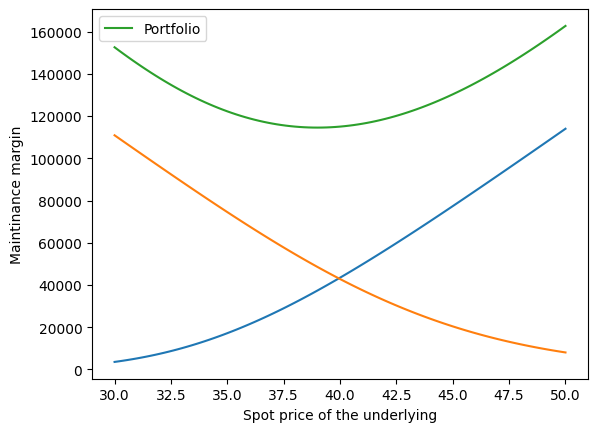

{'otype': 'c', 'quantity': 1, 'strike': 35, 'expiration': 1, 'multiplier': 100, 'reduced': 1, 'value': array([  47.28674739,   51.27815056,   55.50786554,   59.98237709,
         64.70786884,   69.69020115,   74.93489066,   80.44709168,
         86.23157957,   92.29273599,   98.63453632,  105.26053912,
        112.17387767,  119.37725367,  126.872933  ,  134.66274349,
        142.74807485,  151.12988035,  159.80868058,  168.78456886,
        178.05721846,  187.62589134,  197.48944846,  207.64636145,
        218.09472552,  228.83227355,  239.85639117,  251.16413278,
        262.75223828,  274.61715049,  286.75503311,  299.16178903,
        311.83307898,  324.76434036,  337.95080614,  351.38752371,
        365.06937368,  378.99108842,  393.14727034,  407.53240981,
        422.14090263,  436.96706705,  452.00516026,  467.24939419,
        482.69395081,  498.33299669,  514.16069688,  530.17122806,
        546.35879101,  562.71762226,  579.24200504,  595.92627946,
        612.76485195,  629

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import toolkit as ftk

underlying = np.linspace(30, 50, 101)
portfolio = pd.DataFrame([
    {'otype': 'c', 'quantity': 1, 'strike': 35, 'expiration': 1, 'multiplier': 100, 'reduced': 1,
     'value': 100 * ftk.black_scholes.price_call(35, underlying, 0.05, 0.1, 0.5, 0)},
    {'otype': 'p', 'quantity': 1, 'strike': 45, 'expiration': 1, 'multiplier': 100, 'reduced': 1,
     'value': 100 * ftk.black_scholes.price_put(45, underlying, 0.05, 0.1, 0.5, 0)}
    ])

portfolio.apply(lambda option: plt.plot(underlying, ftk.cboe_margin.margin(**option)), axis=1)
plt.plot(underlying, ftk.cboe_margin.margin_strategy(portfolio, underlying), label='Portfolio')
plt.xlabel("Spot price of the underlying")
plt.ylabel("Maintinance margin")
plt.legend()
plt.show()

print(ftk.cboe_margin.margin(**portfolio.iloc[0]))